## Understanding the Data

### `FuelConsumption.csv`:

We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01)

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [20]:
#read the csv file 
df = pd.read_csv(r"C:\Users\Dell\Desktop\Data Science Project\MY2021 Fuel Consumption Ratings.csv")
df.head()

,Year,Make,Model,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption,Hwy_consum,Comb (L/100 km),Comb (mpg),CO2 Emissions,CO2 Rating,Smog
0,0,NaN,NaN,NaN,(L),NaN,NaN,Type,City (L/100 km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),(g/km),Rating,Rating
1,2021,Acura,ILX,Compact,2.4,4.0,AM8,Z,9.9,7,8.6,33,199,6,3
2,2021,Acura,NSX,Two-seater,3.5,6.0,AM9,Z,11.1,10.8,11,26,256,4,3
3,2021,Acura,RDX SH-AWD,SUV: Small,2,4.0,AS10,Z,11,8.6,9.9,29,232,5,6
4,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2,4.0,AS10,Z,11.3,9.1,10.3,27,242,5,6


In [21]:
#Clean the rows and 
df1=df.drop(df.index[0])
df1.head()


,Year,Make,Model,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption,Hwy_consum,Comb (L/100 km),Comb (mpg),CO2 Emissions,CO2 Rating,Smog
1,2021,Acura,ILX,Compact,2.4,4.0,AM8,Z,9.9,7,8.6,33,199,6,3
2,2021,Acura,NSX,Two-seater,3.5,6.0,AM9,Z,11.1,10.8,11,26,256,4,3
3,2021,Acura,RDX SH-AWD,SUV: Small,2,4.0,AS10,Z,11,8.6,9.9,29,232,5,6
4,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2,4.0,AS10,Z,11.3,9.1,10.3,27,242,5,6
5,2021,Acura,TLX SH-AWD,Compact,2,4.0,AS10,Z,11.2,8,9.8,29,230,5,7


In [22]:
#Rename the columns
df2 = df1.rename(columns={'Fuel Consumption':'City_consum','Comb (L/100 km)':'combine_consum','Smog':'smog_rating'})
df2.head()

,Year,Make,Model,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,City_consum,Hwy_consum,combine_consum,Comb (mpg),CO2 Emissions,CO2 Rating,smog_rating
1,2021,Acura,ILX,Compact,2.4,4.0,AM8,Z,9.9,7,8.6,33,199,6,3
2,2021,Acura,NSX,Two-seater,3.5,6.0,AM9,Z,11.1,10.8,11,26,256,4,3
3,2021,Acura,RDX SH-AWD,SUV: Small,2,4.0,AS10,Z,11,8.6,9.9,29,232,5,6
4,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2,4.0,AS10,Z,11.3,9.1,10.3,27,242,5,6
5,2021,Acura,TLX SH-AWD,Compact,2,4.0,AS10,Z,11.2,8,9.8,29,230,5,7


Understanding the table														
Model	4WD/4X4 = Four-wheel drive													
	AWD = All-wheel drive													
	FFV = Flexible-fuel vehicle													
	SWB = Short wheelbase													
	LWB = Long wheelbase													
	EWB = Extended wheelbase													
Transmission	A = automatic													
	AM = automated manual													
	AS = automatic with select shift													
	AV = continuously variable													
	M = manual													
	3 – 10 = Number of gears													
Fuel type	X = regular gasoline													
	Z = premium gasoline													
	D = diesel													
	E = ethanol (E85)													
	N = natural gas													
Fuel consumption	City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per imperial gallon (mpg)													
CO2 emissions	the tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving													
CO2 rating	the tailpipe emissions of carbon dioxide rated on a scale from 1 (worst) to 10 (best)													
Smog rating	the tailpipe emissions of smog-forming pollutants rated on a scale from 1 (worst) to 10 (best)													



*   **MODELYEAR** e.g. 2021
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


### Data Exploration

Let's first have a descriptive exploration on our data.


In [23]:
df2.describe()

,Year,Cylinders
count,935.0,935.000000
mean,2021.0,5.716578
std,0.0,1.977359
min,2021.0,3.000000
25%,2021.0,4.000000
50%,2021.0,6.000000
75%,2021.0,8.000000
max,2021.0,16.000000


In [77]:
cdf=df2[['Engine Size','Cylinders', 'combine_consum', 'CO2 Emissions',]]
cdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 935 entries, 1 to 935
Data columns (total 4 columns):
Engine Size       935 non-null object
Cylinders         935 non-null float64
combine_consum    935 non-null object
CO2 Emissions     935 non-null object
dtypes: float64(1), object(3)
memory usage: 36.5+ KB


In [79]:
cdf = cdf.astype({"CO2 Emissions": float, 'Engine Size':float, 'combine_consum':float}, errors='raise') 

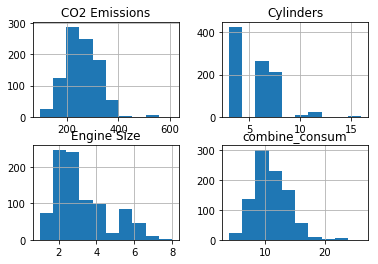

In [80]:
viz=cdf[['Cylinders','Engine Size', 'CO2 Emissions', 'combine_consum']]
viz.hist()
plt.show()

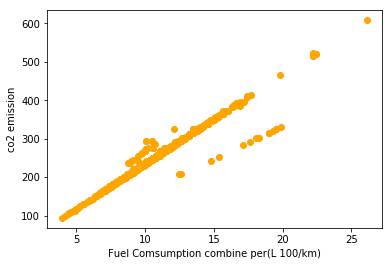

In [81]:
plt.scatter(cdf['combine_consum'],cdf['CO2 Emissions'], color='orange')
plt.xlabel('Fuel Comsumption combine per(L 100/km)')
plt.ylabel('co2 emission')
plt.show()

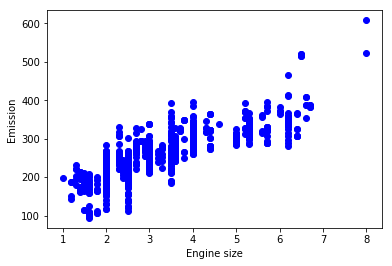

In [82]:
plt.scatter(cdf['Engine Size'],cdf['CO2 Emissions'],  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

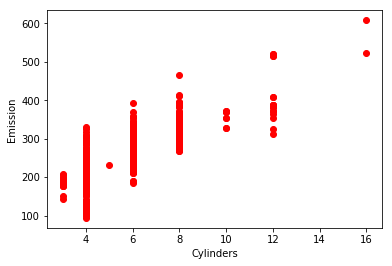

In [83]:
plt.scatter(cdf['Cylinders'], cdf['CO2 Emissions'],  color='red')
plt.xlabel('Cylinders')
plt.ylabel("Emission")
plt.show()

#### Creating train and test dataset
Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using **np.random.rand()** function:

In [84]:
msk = np.random.rand(len(df2)) < 0.8
train = cdf[msk]
test = cdf[~msk]

#### Train Data Distribution

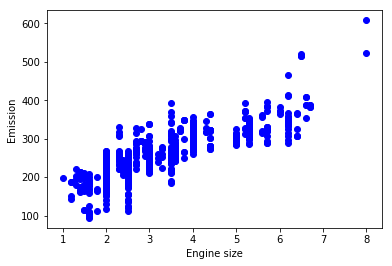

In [85]:
plt.scatter(train['Engine Size'], train['CO2 Emissions'],  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Modelling


In [86]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x =np.asanyarray(train[['Engine Size']])
train_y =np.asanyarray(train[['CO2 Emissions']])
regr.fit(train_x, train_y)
#the coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[38.30718644]]
Intercept:  [135.66317568]


#### Plot output

Text(0,0.5,'Emission')

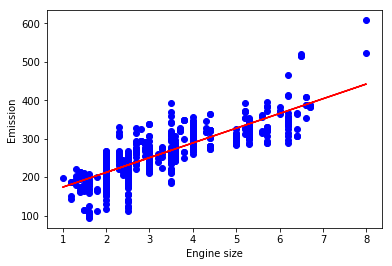

In [87]:
plt.scatter(train['Engine Size'], train['CO2 Emissions'],  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

## model evaluation 


In [88]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Engine Size']])
test_y = np.asanyarray(test[['CO2 Emissions']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 28.97
Residual sum of squares (MSE): 1443.62
R2-score: 0.64


Now we trained a regression model using the `FUELCONSUMPTION combine` feature.

Start by selecting `combine_consum` as the train_x data from the `train` dataframe, then select `c` as the test_x data from the `test` dataframe

In [97]:
train_x = train[["combine_consum"]]

test_x = test[["combine_consum"]]

In [93]:
regr = linear_model.LinearRegression()

regr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [94]:
predictions = regr.predict(test_x)

In [95]:
print("Mean Absolute Error: %.2f" % np.mean(np.absolute(predictions - test_y)))

Mean Absolute Error: 6.76


We can see that the MAE is much worse than it is when we train using `ENGINESIZE`
